<a href="https://colab.research.google.com/github/rb58853/embeddings-chatbot-testing/blob/main/src/all_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intall libraries and git clone

In [22]:
#Clone repo
!git clone https://github.com/ML-Research-Team/embeddings.git

import os
os.chdir('embeddings/src')

#Install libraries
!pip install 'transformers[torch]'
!pip install numpy

Cloning into 'embeddings'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 25 (delta 5), reused 22 (delta 5), pack-reused 0
Receiving objects: 100% (25/25), done.
Resolving deltas: 100% (5/5), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 6.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cach

## Testing Models

In [23]:
from utils import EmbeddingModel, similarity_by_vector

## Simple testing for tallas

In [27]:
XXS = [3,0]
XS = [3,1]
S = [3,2]
m = [3,3]
l = [3,4]
XL = [3,5]
XXL = [3,6]

v1 = XXS
v2 = XXL

print(f'vector: {similarity_by_vector(v1, v2)}')

vector: 0.4472135954999579


### Simple tsting for colors with rgb vector

In [28]:
aquamarine = [20, 230, 160]
olive = [120, 230, 120]
red = [222, 15, 25]
yellow = [255, 255, 0]
orange = [255, 165, 0]
blue = [40,40, 255]
green = [45,244,22]
blue_green = [0, 128, 128]

v1 = blue_green
v2 = aquamarine

print(f'vector: {similarity_by_vector(v1, v2)}')

vector: 0.981773052694052


### Testing all models with simples examples

In [29]:
e5_small =EmbeddingModel("intfloat/e5-small")
e5_large =EmbeddingModel("intfloat/e5-large")
multilingual_e5_small = EmbeddingModel("intfloat/multilingual-e5-small")
distilbert_base_uncased = EmbeddingModel("distilbert-base-uncased")
bert_base_uncased = EmbeddingModel("bert-base-uncased")
roberta_base = EmbeddingModel("roberta-base")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
models = [e5_small, e5_large, multilingual_e5_small,distilbert_base_uncased,bert_base_uncased,roberta_base]

In [32]:
def first_text_vs_all(texts, models):
  for model in models:
    print(f'{model.model_name}:\n')
    text1 = texts[0]
    for j in range(1,len(texts)):
        text2 = texts[j]
        print(f'{text1} vs {text2}:\n - {model.similarity(text1,text2)}')
    print('__________________________________________________________________________')

In [33]:
texts = [
    "raqueta de padel para zurdos",
    "bolsa de raquetas de padel para zurdos",
    "raqueta de padel para ambidietros",
    ]
first_text_vs_all(texts, models)

print('\nkeywords')
texts = [
    "raqueta padel zurdos",
    "bolsa raqueta padel zurdos",
    "raqueta padel ambidiestros",
]
first_text_vs_all(texts, models)

intfloat/e5-small:

raqueta de padel para zurdos vs es bolsa de raquetas de padel para zurdos:
 - 0.9600124359130859
raqueta de padel para zurdos vs es raqueta de padel para ambidietros:
 - 0.9360686540603638
__________________________________________________________________________
intfloat/e5-large:

raqueta de padel para zurdos vs es bolsa de raquetas de padel para zurdos:
 - 0.9597803354263306
raqueta de padel para zurdos vs es raqueta de padel para ambidietros:
 - 0.9393530488014221
__________________________________________________________________________
intfloat/multilingual-e5-small:

raqueta de padel para zurdos vs es bolsa de raquetas de padel para zurdos:
 - 0.9593085050582886
raqueta de padel para zurdos vs es raqueta de padel para ambidietros:
 - 0.9421345591545105
__________________________________________________________________________
distilbert-base-uncased:

raqueta de padel para zurdos vs es bolsa de raquetas de padel para zurdos:
 - 0.9687214493751526
raqueta de p

In [34]:
texts = [
    "Pantalon talla extra large",
    "Pantalon talla extra small",
    "Pantalon talla medium",
    ]
first_text_vs_all(texts, models)


intfloat/e5-small:

Pantalon talla extra large vs Pantalon talla extra small:
 - 0.9696727991104126
Pantalon talla extra large vs Pantalon talla medium:
 - 0.9482710957527161
__________________________________________________________________________
intfloat/e5-large:

Pantalon talla extra large vs Pantalon talla extra small:
 - 0.9559967517852783
Pantalon talla extra large vs Pantalon talla medium:
 - 0.9372074604034424
__________________________________________________________________________
intfloat/multilingual-e5-small:

Pantalon talla extra large vs Pantalon talla extra small:
 - 0.9658886194229126
Pantalon talla extra large vs Pantalon talla medium:
 - 0.9177154898643494
__________________________________________________________________________
distilbert-base-uncased:

Pantalon talla extra large vs Pantalon talla extra small:
 - 0.9814617037773132
Pantalon talla extra large vs Pantalon talla medium:
 - 0.8940823078155518
________________________________________________________

In [41]:
texts = [
    "raqueta de padel para jugadores zurdos",
    "bolsa de raquetas de padel para jugadores zurdos",
    "raqueta de padel para cualquier tipo de jugadores",
    ]
first_text_vs_all(texts, models)



intfloat/e5-small:

raqueta de padel para jugadores zurdos vs bolsa de raquetas de padel para jugadores zurdos:
 - 0.9738227128982544
raqueta de padel para jugadores zurdos vs raqueta de padel para cualquier tipo de jugadores:
 - 0.9747639894485474
__________________________________________________________________________
intfloat/e5-large:

raqueta de padel para jugadores zurdos vs bolsa de raquetas de padel para jugadores zurdos:
 - 0.9736931324005127
raqueta de padel para jugadores zurdos vs raqueta de padel para cualquier tipo de jugadores:
 - 0.9719843864440918
__________________________________________________________________________
intfloat/multilingual-e5-small:

raqueta de padel para jugadores zurdos vs bolsa de raquetas de padel para jugadores zurdos:
 - 0.9844278693199158
raqueta de padel para jugadores zurdos vs raqueta de padel para cualquier tipo de jugadores:
 - 0.9510782361030579
__________________________________________________________________________
distilbert-base

In [42]:
texts = [
  "Left-handed paddle racket", "Bags of left-handed paddle rackets", "Paddle racket for any type of players"
]
first_text_vs_all(texts, models)

intfloat/e5-small:

Left-handed paddle racket vs Bags of left-handed paddle rackets:
 - 0.9543269872665405
Left-handed paddle racket vs Paddle racket for any type of players:
 - 0.8881412148475647
__________________________________________________________________________
intfloat/e5-large:

Left-handed paddle racket vs Bags of left-handed paddle rackets:
 - 0.954788327217102
Left-handed paddle racket vs Paddle racket for any type of players:
 - 0.874755859375
__________________________________________________________________________
intfloat/multilingual-e5-small:

Left-handed paddle racket vs Bags of left-handed paddle rackets:
 - 0.9560558795928955
Left-handed paddle racket vs Paddle racket for any type of players:
 - 0.8830575942993164
__________________________________________________________________________
distilbert-base-uncased:

Left-handed paddle racket vs Bags of left-handed paddle rackets:
 - 0.9267876744270325
Left-handed paddle racket vs Paddle racket for any type of play

In [39]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.4 MB/s eta 0:00:00


## Testing sentence models (F)

In [45]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


def similarity(text1, text2, model):
    # Embeddings de dos palabras o documentos
    embeddings = model.encode([text1,text2])
    embedding1 = np.array(embeddings[0])
    embedding2 = np.array(embeddings[1])

    # Redimensionar los arrays para que coincidan con la forma de entrada esperada de cosine_similarity
    embedding1 = embedding1.reshape(1, -1)
    embedding2 = embedding2.reshape(1, -1)
    # Calcular la similitud del coseno
    return cosine_similarity(embedding1, embedding2)[0][0]


In [50]:
def sentence_models(texts, models):
  for model in models:
    text1 = texts[0]
    for j in range(1,len(texts)):
        text2 = texts[j]
        print(f'{text1} vs {text2}:\n - {similarity(text1,text2, model)}')
    print('__________________________________________________________________________')

In [48]:
from sentence_transformers import SentenceTransformer

# Carga el modelo
model = SentenceTransformer('all-MiniLM-L6-v2')



In [51]:
# Frases para las que quieres generar embeddings
sentences = [
    "raqueta de padel para jugadores zurdos",
    "bolsa de raquetas de padel para jugadores zurdos",
    "raqueta de padel para cualquier tipo de jugadores",
]
sentence_models(sentences, [model])

raqueta de padel para jugadores zurdos vs bolsa de raquetas de padel para jugadores zurdos:
 - 0.9707424640655518
raqueta de padel para jugadores zurdos vs raqueta de padel para cualquier tipo de jugadores:
 - 0.9191739559173584
__________________________________________________________________________


In [52]:
sentences = [
  "Left-handed paddle racket", "Bags of left-handed paddle rackets", "Paddle racket for any type of players"
]
sentence_models(sentences, [model])

Left-handed paddle racket vs Bags of left-handed paddle rackets:
 - 0.8386325836181641
Left-handed paddle racket vs Paddle racket for any type of players:
 - 0.7306244373321533
__________________________________________________________________________


Hasta GPT3 Se confunde con esto

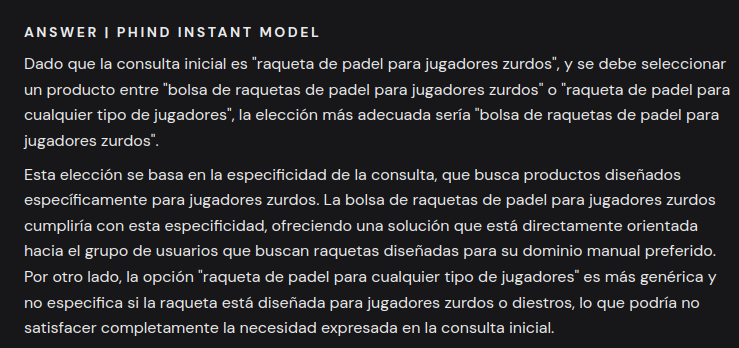

Esto mejora si lo de categoria esta tiza, de esa forma se sabe que la cateoria que se busca es raquetas de padel y no bolsas de padel. Por ejemplo
